In [ ]:
first_name= "Amirabbas"
last_name= "Afzali"
student_number= "400100662"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
df = pd.read_csv('Heart_Disease_Dataset.csv')

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.shape

(1190, 12)

- data size

In [ ]:
print(f'Number of features : {df.shape[1]-1}')
print(f'Number of samples : {df.shape[0]}')

Number of features : 11
Number of samples : 1190


- missing values detection

In [ ]:
# Fore example :
s = pd.Series([1, 2, None, 4, 9])
has_nan = s.isnull().any()
print(has_nan)

True


In [ ]:
for row_index in range(df.shape[0]):
    if df.iloc[row_index].isnull().any():
        print(f'{row_index+1}th sample has Nan feature!')


None of the examples have the  Nan feature value.

- class balancing analysis

In [ ]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [ ]:
print(f'percent of class1 = {df["target"].value_counts()[1] / df.shape[0]}')
print(f'percent of class0 = {df["target"].value_counts()[0] / df.shape[0]}')

percent of class1 = 0.5285714285714286
percent of class0 = 0.4714285714285714


number of samples with label 1  :   629

number of samples with label 0  :   561

- **Sex** and **Age** distribution for each class :

In [ ]:
df_class0 = df[df['target'] == 0]
df_class1 = df[df['target'] == 1]

**age** histogram of class 0 :

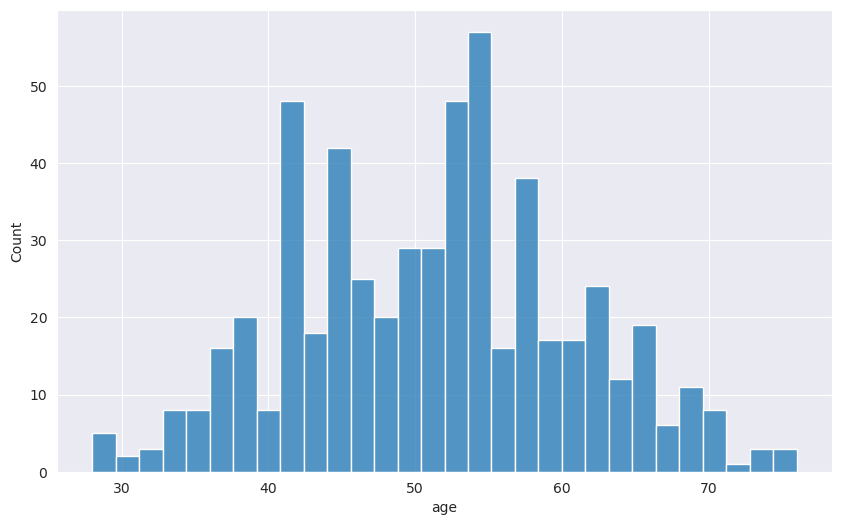

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_class0['age'],bins=30);

**age** histogram of class 1 :

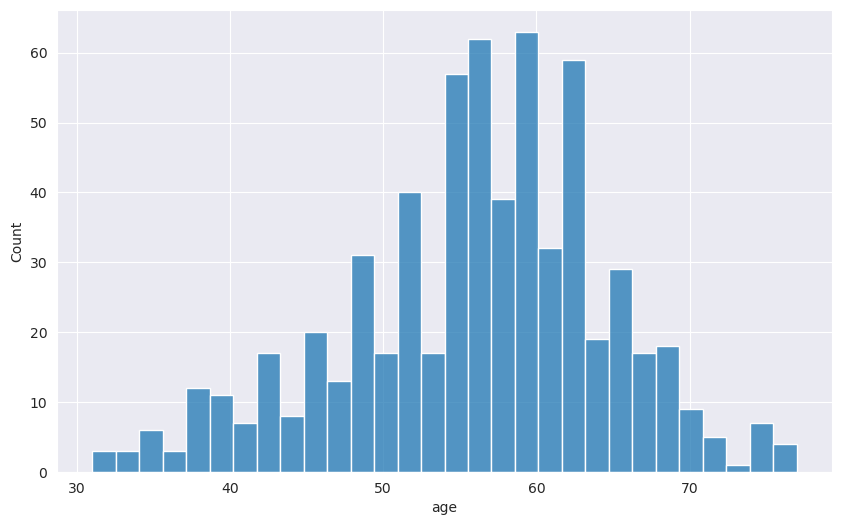

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_class1['age'],bins=30);

barplot of sex features for class 0 :

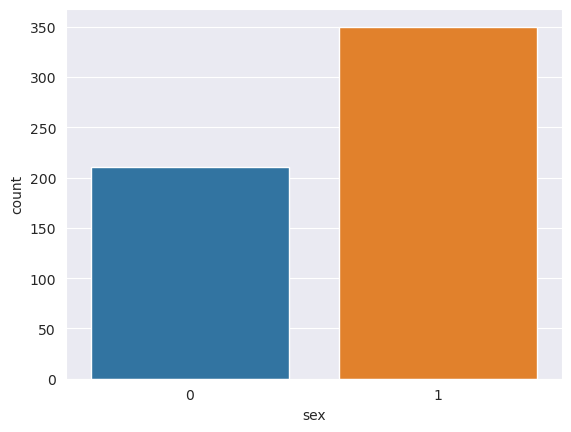

In [ ]:
sns.set_style('darkgrid')
sns.barplot(x=[0,1],y=[df_class0['sex'].value_counts()[0],df_class0['sex'].value_counts()[1]]);
plt.xlabel('sex');
plt.ylabel('count');

barplot of sex features for class 1 :

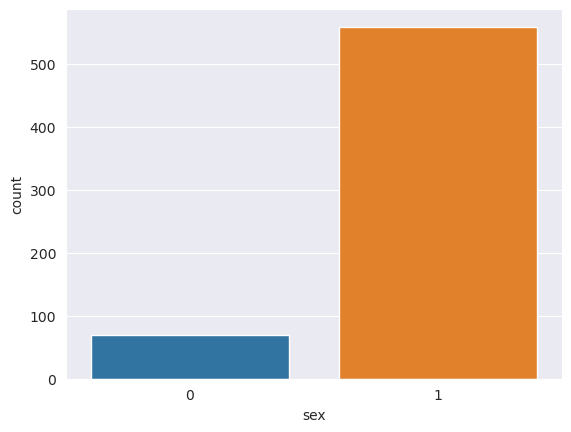

In [ ]:
sns.barplot(x=[0,1],y=[df_class1['sex'].value_counts()[0],df_class1['sex'].value_counts()[1]]);
plt.xlabel('sex');
plt.ylabel('count');

- remove Outliers

In [ ]:
outlier_samples = []
for feature in df.columns[:-1]:
    mean = df[feature].mean()
    std = df[feature].std()

    # Define the threshold as 3 times the standard deviation
    threshold = 3 * std

    # Identify the outliers
    outliers = np.abs(df[feature] - mean) > threshold

    # Retrieve the indices of the outliers
    outlier_indices = df.index[outliers]
    if outlier_indices.shape[0]>0:
        outlier_samples.extend(outlier_indices.values.tolist())
        print(f'Outlier samples in feature {feature} : {outlier_indices.values}')

outlier_samples = np.unique(outlier_samples)

Outlier samples in feature resting bp s : [ 109  242  366  400  450  593  734  761 1013 1075]
Outlier samples in feature cholesterol : [  30   76  149  618 1039]
Outlier samples in feature max heart rate : [371 391]
Outlier samples in feature oldpeak : [ 167  325  704  773  793  852  978 1010 1070 1078 1172]


In [ ]:
outlier_samples

array([  30,   76,  109,  149,  167,  242,  325,  366,  371,  391,  400,
        450,  593,  618,  704,  734,  761,  773,  793,  852,  978, 1010,
       1013, 1039, 1070, 1075, 1078, 1172])

Remove outlier samples :

In [ ]:
print(f'number of all samples = {df.shape[0]}')
df = df.drop(outlier_samples.tolist())
print(f'number of remained samples = {df.shape[0]}')

number of all samples = 1190
number of remained samples = 1162


In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


- Noramlize numeric features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in df.columns:
    if col in ['age','max heart rate','oldpeak','resting bp s','cholesterol']:
        # print(col)
        df[col] = scaler.fit_transform(df[[col]])

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0


- train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'shape of X_train : {X_train.shape}')
print(f'shape of y_train : {y_train.shape[0]}')
print(f'shape of X_test : {X_test.shape}')
print(f'shape of y_test : {y_test.shape[0]}')

shape of X_train : (813, 11)
shape of y_train : 813
shape of X_test : (349, 11)
shape of y_test : 349


- Classification using `SVM` model

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

We use `gridsearch` to find best parameter (C , gamma and degree).

**Linear** kernel :

In [ ]:
# Create an SVM classifier
svm_linear = svm.SVC(kernel='linear')

C_range = np.arange(0.1, 2, 0.1)

param_grid = dict(C=C_range)
grid = GridSearchCV(svm_linear, param_grid=param_grid)
grid.fit(X_train, y_train)


print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.2} with a score of 0.83


In [ ]:
# Train the classifier on the training data
svm_linear = svm.SVC(kernel='linear',C=0.2)

svm_linear.fit(X_train,y_train)

# Calculate the accuracy of the classifier
y_pred_linear = svm_linear.predict(X_test)
SVM_acc = accuracy_score(y_pred_linear,y_test)
print("Accuracy:", SVM_acc)


Accuracy: 0.8252148997134671


**RBF** kernel :

In [ ]:
# Create an SVM classifier
svm_rbf = svm.SVC(kernel='rbf')

gamma_range = np.arange(0.1, 10, 0.2)
C_range = np.arange(0.1, 10, 0.5)

param_grid = dict(gamma=gamma_range,C=C_range)
grid = GridSearchCV(svm_rbf, param_grid=param_grid)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 6.6, 'gamma': 1.9000000000000004} with a score of 0.88


In [ ]:
# Train the classifier on the training data
svm_rbf = svm.SVC(kernel='rbf',gamma=1.900,C=6.6)

svm_rbf.fit(X_train,y_train)

# Calculate the accuracy of the classifier
y_pred_rbf = svm_rbf.predict(X_test)
SVM_acc = accuracy_score(y_pred_rbf,y_test)
print("Accuracy:", SVM_acc)


Accuracy: 0.8510028653295129


**Poⅼynoⅿinaⅼ** kernel :

In [ ]:
# Create an SVM classifier
svm_poly = svm.SVC(kernel='poly')

degree_range = np.arange(1, 16, 1)
C_range = np.arange(0.1, 10, 0.5)

param_grid = dict(degree=degree_range,C=C_range)
grid = GridSearchCV(svm_poly, param_grid=param_grid)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.6, 'degree': 11} with a score of 0.87


In [ ]:
# Train the classifier on the training data
svm_poly = svm.SVC(kernel='poly',degree=11,C=0.6)

svm_poly.fit(X_train,y_train)

# Calculate the accuracy of the classifier
y_pred_poly = svm_poly.predict(X_test)
SVM_acc = accuracy_score(y_pred_poly,y_test)
print("Accuracy:", SVM_acc)


Accuracy: 0.8653295128939829


- Report `Accuracy` , `Reⅽaⅼⅼ` , `Preⅽision` and `F1score`

for **Linear** kernel :

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear)}")
print(f"Precision: {precision_score(y_test, y_pred_linear)}")
print(f"Recall: {recall_score(y_test, y_pred_linear)}")
print(f"F1 Score: {f1_score(y_test, y_pred_linear)}")

Accuracy: 0.833810888252149
Precision: 0.8059701492537313
Recall: 0.8950276243093923
F1 Score: 0.8481675392670157


for **RBF** kernel :

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf)}")
print(f"Precision: {precision_score(y_test, y_pred_rbf)}")
print(f"Recall: {recall_score(y_test, y_pred_rbf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rbf)}")

Accuracy: 0.8510028653295129
Precision: 0.8208955223880597
Recall: 0.9116022099447514
F1 Score: 0.8638743455497382


for **Poⅼynoⅿinaⅼ** kernel :

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly)}")
print(f"Precision: {precision_score(y_test, y_pred_poly)}")
print(f"Recall: {recall_score(y_test, y_pred_poly)}")
print(f"F1 Score: {f1_score(y_test, y_pred_poly)}")

Accuracy: 0.8653295128939829
Precision: 0.8722222222222222
Recall: 0.8674033149171271
F1 Score: 0.8698060941828255
